# Домашнее задание №2

### Николаев Евгнеий Алексеевич, группа 22.М08-мм.

Гистограммные преобразования. Эквализация. Преобразовать и показать как изображения, так и гистограммы – исходные и то, что получилось.
+ глобальная;
+ локальная, с параметром - размер окна.

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def transform_image(image_path, transform_function, **kwargs):
    # чтение изображения
    img = cv2.imread(image_path) 
    # конвертация в оттенки серого
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # вычисление гистограммы и вывод исходного изображения
    hist, bins = np.histogram(img, bins=256, range=(0, 256)) 
    cdf = hist.cumsum()
    cdf_normalized = cdf*float(hist.max())/cdf.max()    
    plt.figure(figsize=(12, 12), dpi=250)
    plt.subplot(2,2,1); 
    plt.imshow(img,cmap='gray') 
    plt.title("Изначальное изображение")
    plt.subplot(2,2,2)
    plt.plot(cdf_normalized, color = 'r')
    plt.hist(img.flatten(), bins=256, range=(0, 256)) 
    plt.title("Гистограмма")
    plt.xlabel('Значение пикселя')
    plt.ylabel('Количество пикселей')
    plt.legend(('cdf','histogram'), loc = 'upper left')
    
    # применение функции преобразования и вывод преобразованного изображения
    transformed_img = transform_function(img, **kwargs)
    hist_equ, bins_equ = np.histogram(transformed_img, bins=256, range=(0, 256)) 
    cdf_equ = hist_equ.cumsum()
    cdf_normalized_equ = cdf_equ*float(hist_equ.max())/cdf_equ.max()
    
    plt.subplot(2,2,3)
    plt.imshow(transformed_img, cmap='gray') 
    plt.title("Преобразованное изображение")
    
    # вывод гистограммы после преобразования
    plt.subplot(2,2,4)
    plt.plot(cdf_normalized_equ, color = 'r')
    plt.hist(transformed_img.flatten(), bins=256, range=(0, 256)) 
    plt.title("Гистограмма")
    plt.xlabel('Значение пикселя')
    plt.ylabel('Количество пикселей')
    plt.legend(('cdf','histogram'), loc = 'upper left')

## Глобальная

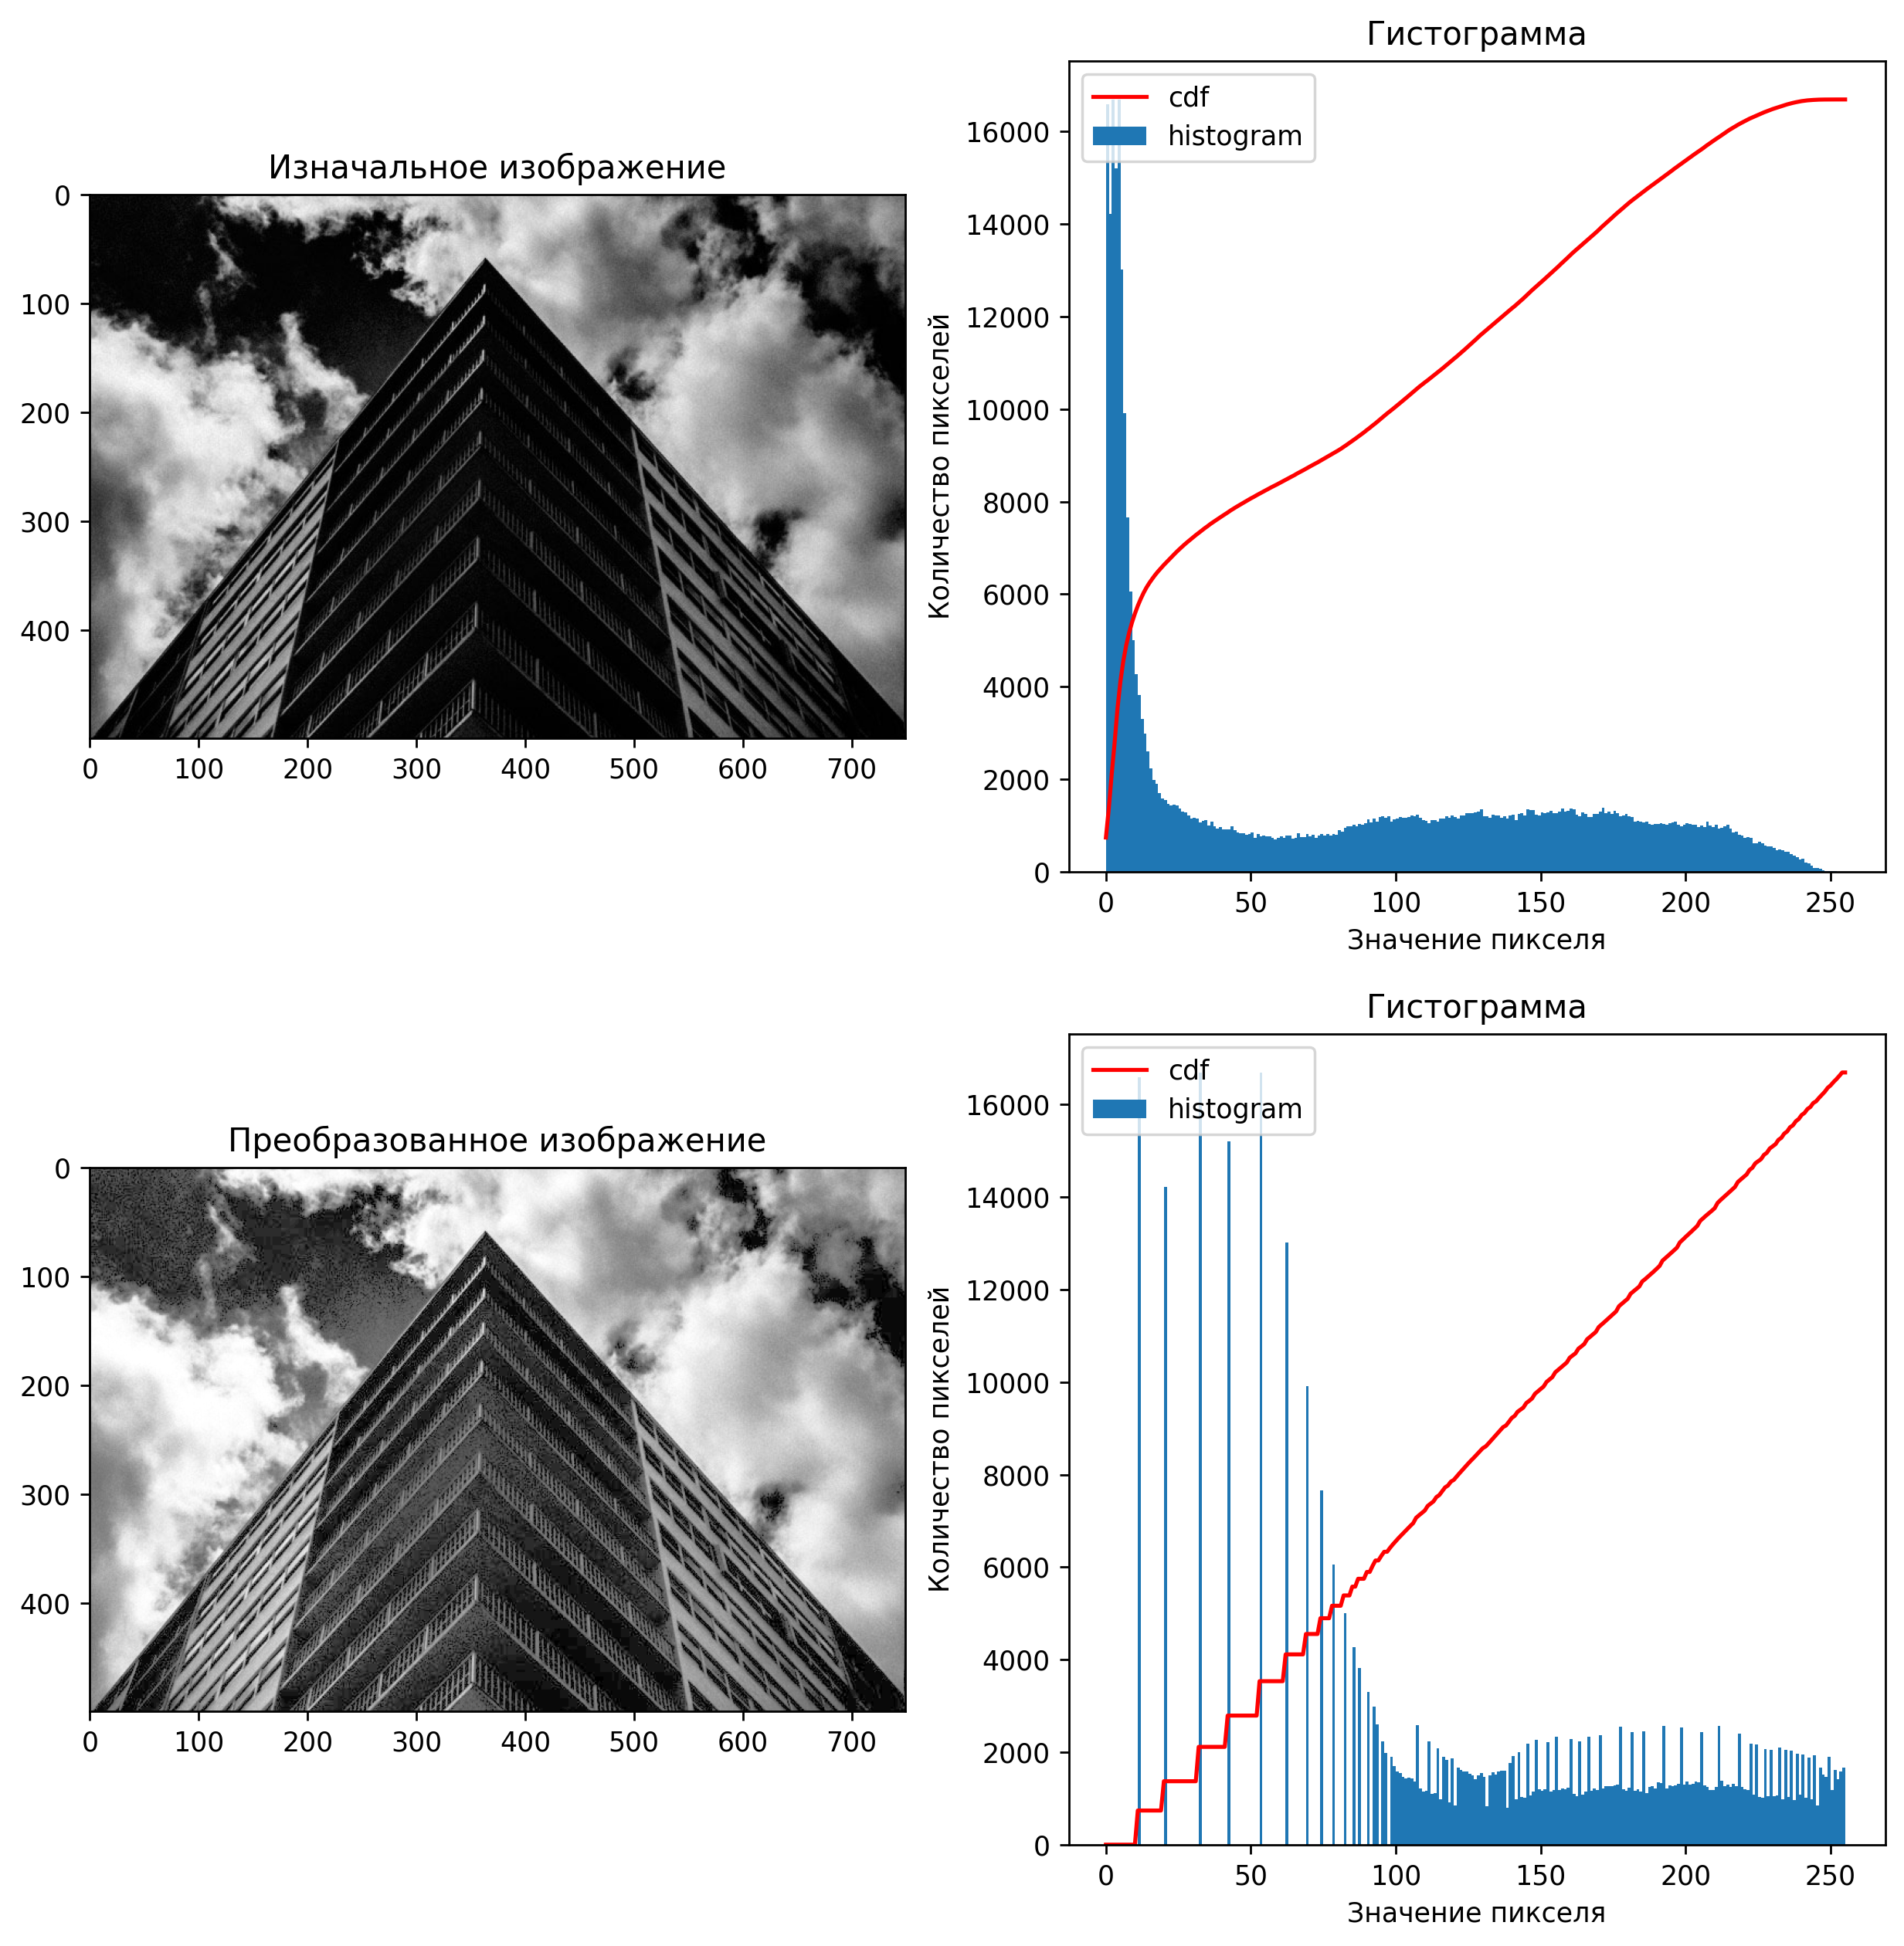

In [24]:
def equalize_image_histogram(image):
    # Получение гистограммы изображения
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))
    # Вычисление функции преобразования гистограммы
    cumulative_hist = hist.cumsum()
    normalized_hist = cumulative_hist * hist.max() / cumulative_hist.max()
    min_normalized_hist = normalized_hist[normalized_hist.nonzero()].min()
    equalized_image = np.round((255 * (cumulative_hist[image] - min_normalized_hist) / (image.size - 1)))
    return equalized_image.astype("uint8")

transform_image('mh3.jpg', histogram_equalization) 

Конкретно, функция equalize_image_histogram принимает изображение в качестве входных данных и выполняет следующие действия:

+ Вычисляет гистограмму изображения с помощью np.histogram.
+ Вычисляет кумулятивную функцию гистограммы и нормализует ее.
+ Находит минимальное ненулевое значение в нормализованной кумулятивной функции гистограммы и сохраняет его.
+ Вычисляет эквализированное изображение с помощью формулы, которая перераспределяет значения яркости пикселей изображения с учетом минимального значения ненулевой нормализованной кумулятивной функции гистограммы.
+ Возвращает эквализированное изображение в качестве выходных данных.

В результате выполнения этой функции будет возвращено эквализированное изображение, которое имеет более равномерное распределение яркостей и более выраженные детали.

## Локальная

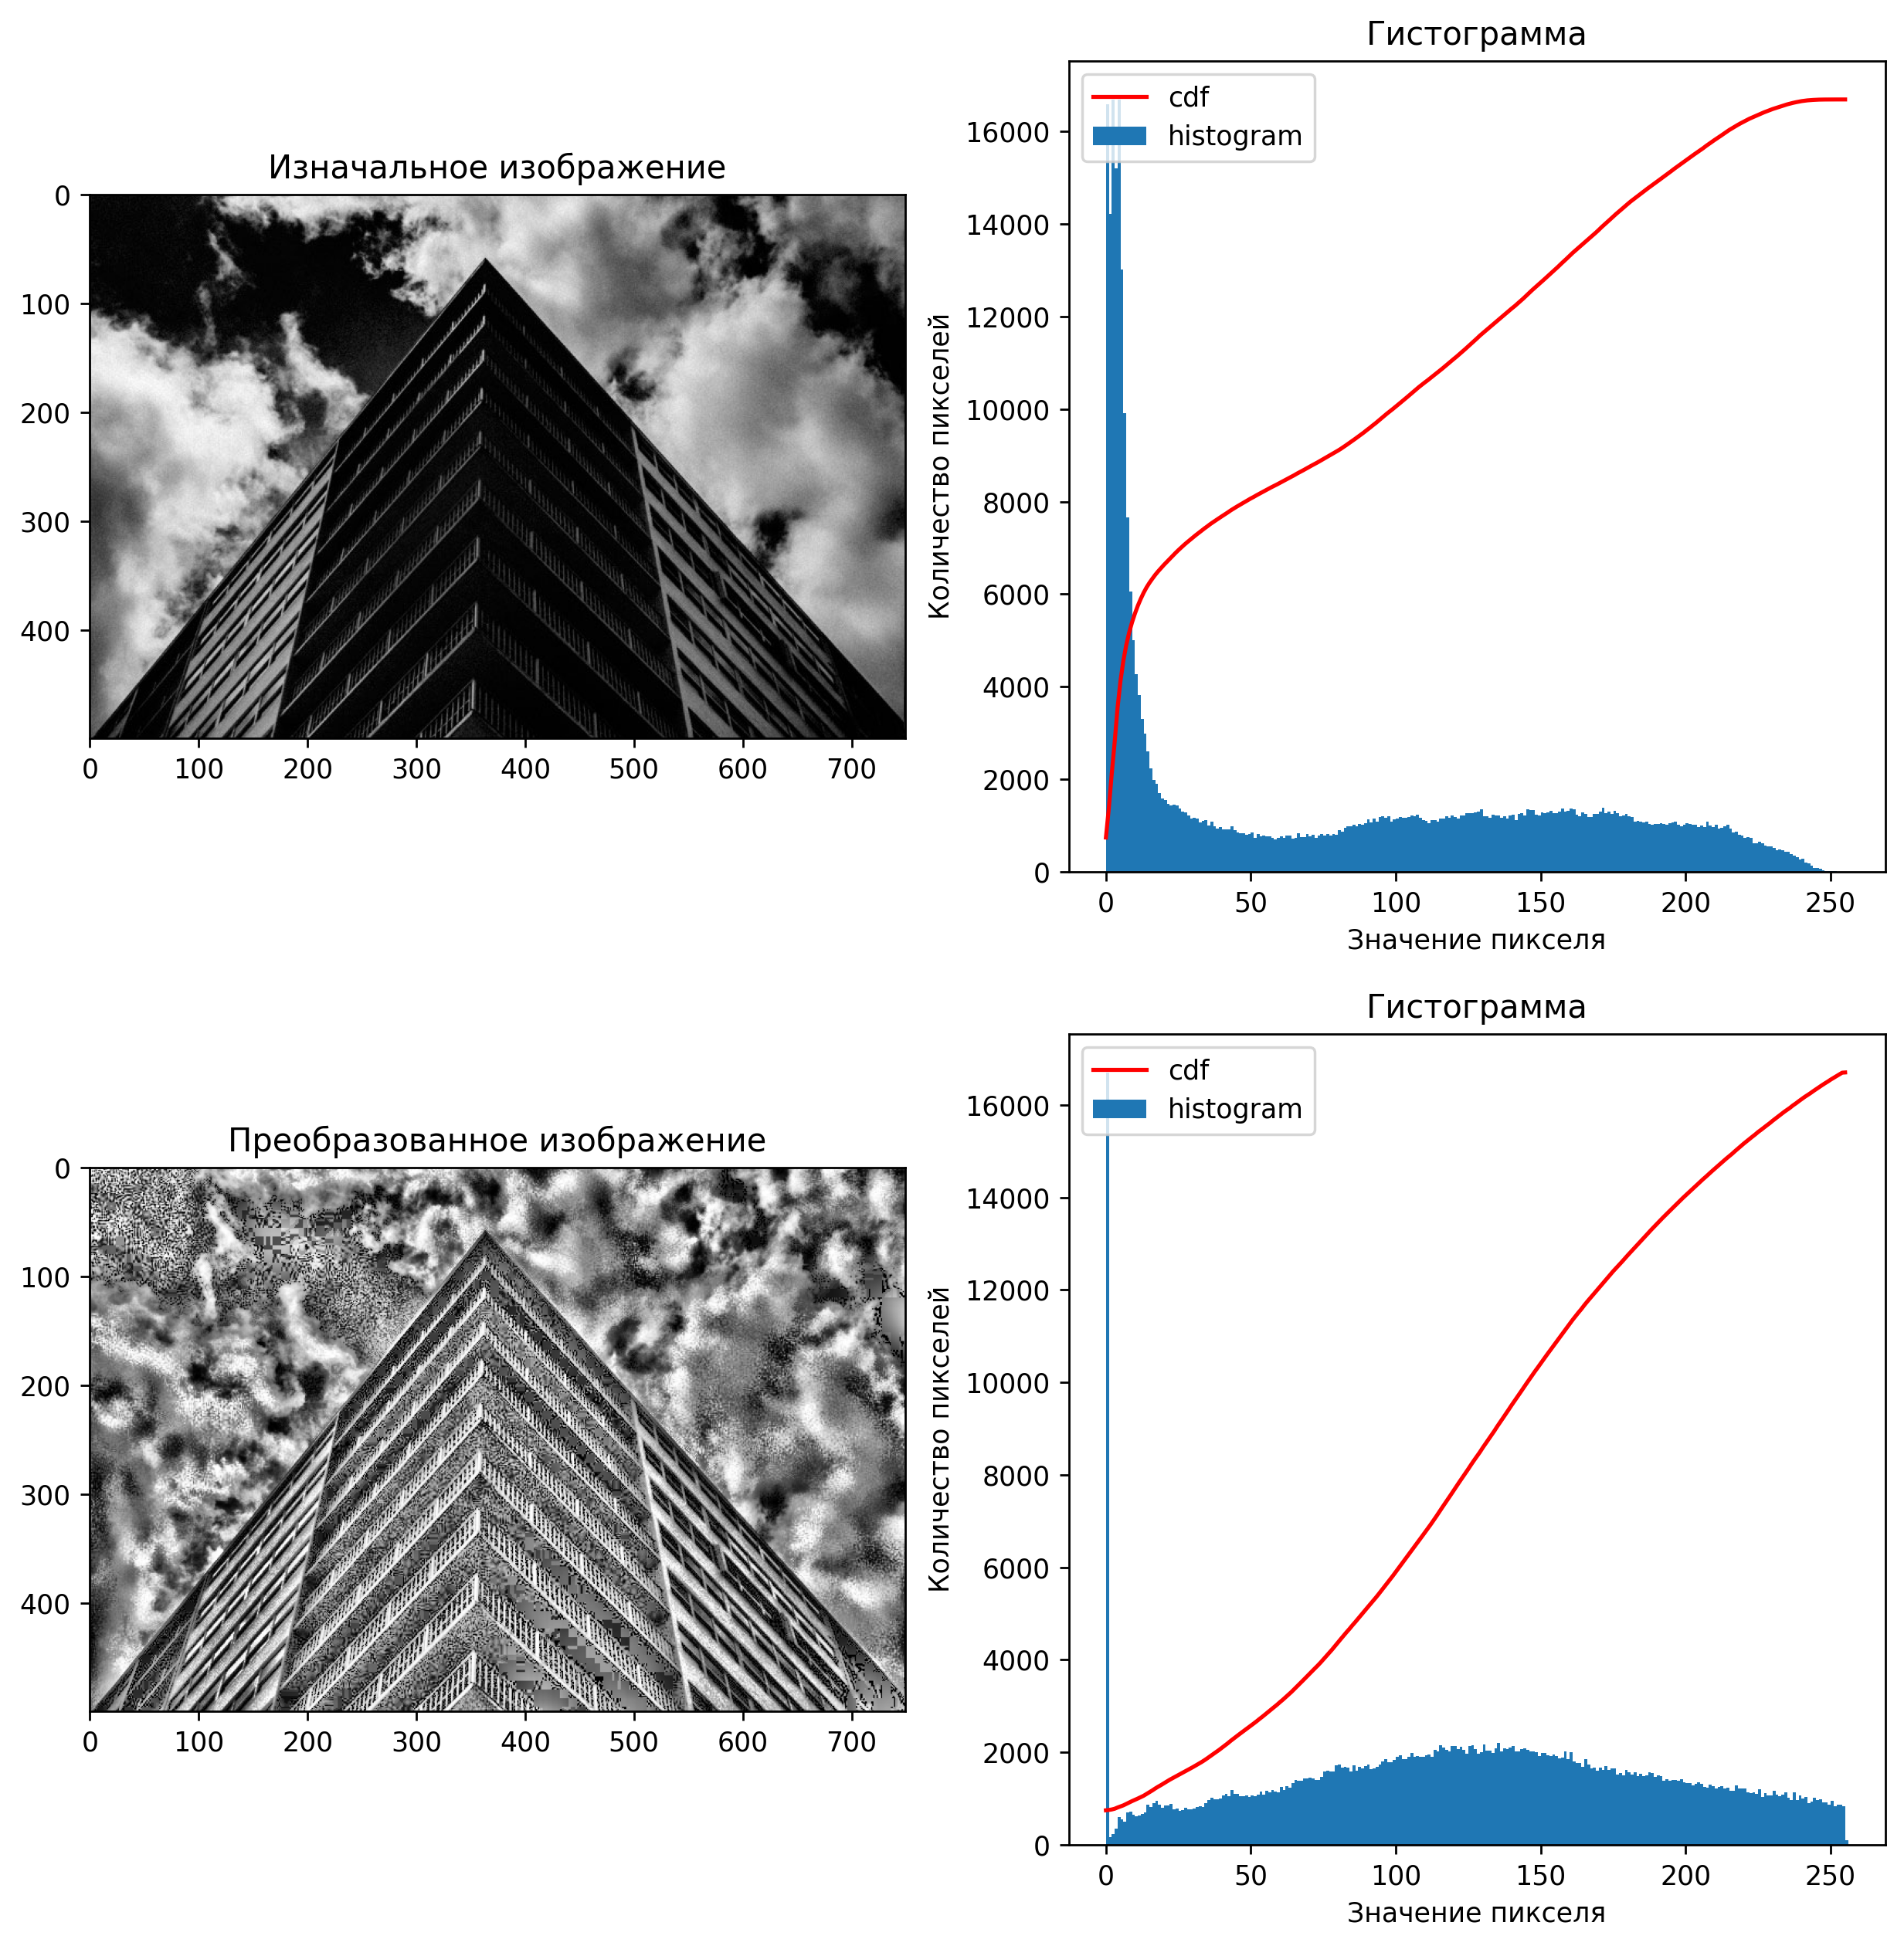

In [25]:
def apply_local_histogram_processing(image, window_size=50, method='linear'):
    height, width = image.shape[:2]
    result = np.zeros((height, width), dtype=np.uint8)

    # Перебираем каждый пиксель изображения
    for i in range(height):
        for j in range(width):
            # Определяем границы локальной области
            x_min = max(0, i - window_size // 2)
            x_max = min(height - 1, i + window_size // 2)
            y_min = max(0, j - window_size // 2)
            y_max = min(width - 1, j + window_size // 2)

            # Вычисляем гистограмму локальной области
            local_region = image[x_min:x_max+1, y_min:y_max+1]
            hist, _ = np.histogram(local_region, bins=256, range=[0, 256])

            # Вычисляем кумулятивную функцию распределения (CDF)
            cdf = hist.cumsum()

            # Выбираем метод эквализации гистограммы
            if method == 'linear':
                # Нормализуем CDF линейно
                cdf_norm = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            elif method == 'equalize':
                # Эквализируем гистограмму используя CDF
                cdf_norm = (cdf / cdf.max()) * 255

            # Отображаем значение пикселя на нормализованном CDF
            result[i, j] = cdf_norm[image[i, j]]

    return result

transform_image('mh3.jpg', apply_local_histogram_processing)

Данная функция применяет локальную обработку гистограммы к входному изображению.

Она принимает входное изображение (в виде numpy массива) и размер окна (window_size) для определения локальной области. Метод обработки гистограммы (method) может быть линейным (linear) или эквализацией гистограммы (equalize).

Затем для каждого пикселя в изображении функция определяет локальную область (прямоугольную область размером window_size x window_size) вокруг пикселя и вычисляет гистограмму этой области. Затем она вычисляет кумулятивную функцию распределения (CDF) для этой гистограммы и нормализует ее линейно или с помощью эквализации гистограммы. Наконец, значение пикселя заменяется на соответствующее значение в нормализованном CDF.

В результате функция возвращает измененное изображение, в котором гистограмма локальных областей была обработана.